## Experiment with flight data APIs

Initial goal: compare deterministic optimal (cheapest) flight search to agent-driven one

In [1]:
from utils.utils import get_flights_to_destinations, plot_price_distribution

import nest_asyncio
nest_asyncio.apply()

import pandas as pd

Test query with the function

In [2]:
flights_df = get_flights_to_destinations(
    date="2025-05-02",
    from_airport="EWR",
    to_airports=[
        "ORY",  # Orly
        "BVA",  # Beauvais
        "CDG",  # Charles de Gaulle
    ],
    max_stops=1,
    #trip="one-way",
    #passengers_adults=2,
)

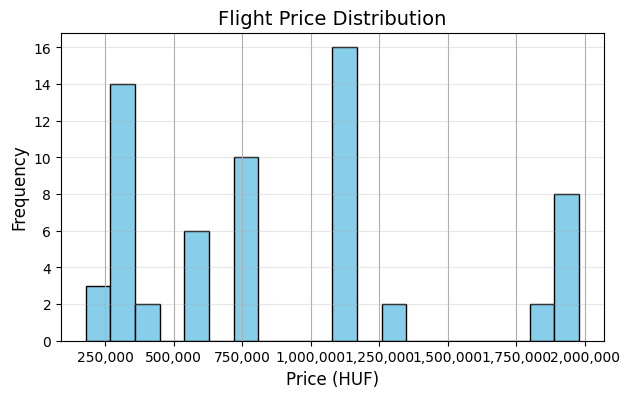

In [3]:
fig = plot_price_distribution(flights_df)

In [4]:
pd.DataFrame(flights_df['name'].value_counts())

,count
name,
Tap Air Portugal,32
"United, Tap Air Portugal",8
Delta,8
French bee,2
Self transferThis trip includes tickets from multiple airlines. Missed connections may be protected by the booking provider.,2
LOT,2
La Compagnie,2
Icelandair,2
United,2


In [5]:
flights_df.head(3)

,price,departure_date,departure_time,arrival_date,arrival_time,duration_hours,name,stops,is_best,price_denomination
0,179194,2025-05-02,23:00,2025-05-03,12:15,7.250,French bee,0,True,HUF
1,403649,2025-05-02,20:25,2025-05-03,21:55,19.500,Self transferThis trip includes tickets from m...,1,True,HUF
2,601430,2025-05-02,20:20,2025-05-03,19:25,17.083,LOT,1,True,HUF


### General tool-calling agent

Showcasing tool calling capabilities by assigning the above function as a tool to an OpenAI model. Tool will return with the pandas under the hood, the AI will analyze the content and provide an answer